In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("C:/Users/Divya/Downloads/indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
#Convert Categorical Column (Gender) to Numerical
from sklearn.preprocessing import LabelEncoder
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [10]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
# Drop the "Dataset" column (target variable)
df_features = df.drop(columns=["Dataset"])
df_features.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [18]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


In [19]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

In [20]:
X_scaled

array([[ 1.25209764,  1.76228085, -0.41887783, ...,  0.29211961,
         0.19896867, -0.14789798],
       [ 1.06663704, -0.56744644,  1.22517135, ...,  0.93756634,
         0.07315659, -0.65069686],
       [ 1.06663704, -0.56744644,  0.6449187 , ...,  0.47653296,
         0.19896867, -0.17932291],
       ...,
       [ 0.44843504, -0.56744644, -0.4027597 , ..., -0.0767071 ,
         0.07315659,  0.16635131],
       [-0.84978917, -0.56744644, -0.32216906, ...,  0.29211961,
         0.32478075,  0.16635131],
       [-0.41704777, -0.56744644, -0.37052344, ...,  0.75315299,
         1.58290153,  1.73759779]])

In [27]:
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [28]:
X_pca

array([[-0.80552163, -0.75246625],
       [ 1.64149729,  0.6464684 ],
       [ 0.8430685 ,  0.27883112],
       ...,
       [-0.46192769, -0.45590048],
       [-0.88769112,  0.1491987 ],
       [-2.10995912,  1.19092624]])

In [29]:
# Convert PCA results into a DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-0.805522,-0.752466
1,1.641497,0.646468
2,0.843068,0.278831
3,-0.723413,-0.401186
4,1.007421,-1.224424


In [33]:
# Show explained variance ratio
explained_variance = pca.explained_variance_ratio_

In [34]:
print("Explained Variance by PC1:", explained_variance[0])

Explained Variance by PC1: 0.27770398830117665


In [35]:
print("Explained Variance by PC2:", explained_variance[1])

Explained Variance by PC2: 0.20263481202058486


In [36]:
print("Total Variance Explained:", sum(explained_variance))

Total Variance Explained: 0.4803388003217615


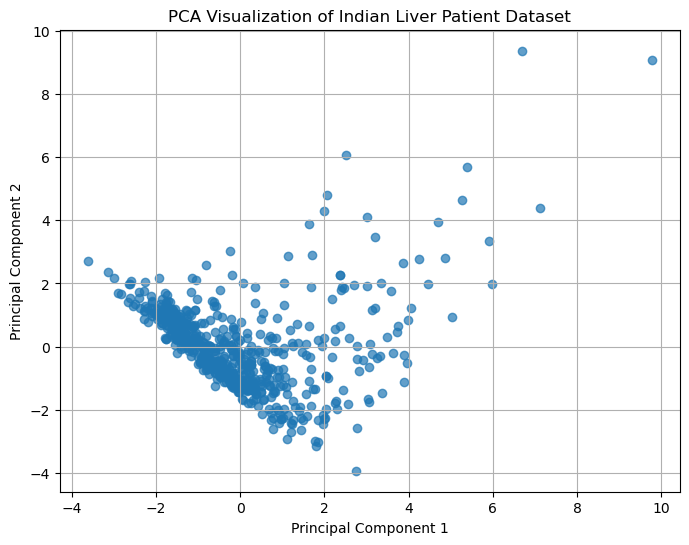

In [37]:
import matplotlib.pyplot as plt

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Indian Liver Patient Dataset")
plt.grid(True)
plt.show()

### Interpret

The original dataset consists of 10 numerical features after preprocessing (excluding the "Dataset" column).

Each feature represents a dimension, meaning our data exists in a 10-dimensional space.

PCA works best when all features are on the same scale.

We use StandardScaler to standardize all features to have mean = 0 and standard deviation = 1.

We apply PCA to transform the 10D data into a lower-dimensional space.

Compute Covariance Matrix: Identifies correlations between features.

Compute Eigenvalues & Eigenvectors:
       Eigenvectors (Principal Components) are new axes capturing variance.
       Eigenvalues indicate the importance (variance explained) by each component.

Select Top Principal Components: Keep components with the highest variance.

After reducing from 10D → 2D, we check how much of the original variance is preserved:
   
Even though we reduced from 10 dimensions to 2, we still retain 48.03% of the dataset’s information.

If we needed more accuracy, we could keep more components (e.g., 3 or 4 PCs).
